In [3]:
import json
from sc3D import Embryo
from IPython.display import display

corres_tissues = 'data/corresptissues.json'
with open('data/tissuescolor.json') as f:
    colors_paper = json.load(f)
    colors_paper = {eval(k): v for k, v in colors_paper.items()}
%matplotlib inline

# Setting up parameters
Note that it is necessary to download the E8.5.h5ad dataset!

The dataset can be found [there](https://figshare.com/s/1c29d867bc8b90d754d2) (it is under the name `E8.5-Atlas.h5ad`).

In [4]:
# Path to the input data
data_path = 'data/E8.5-Atlas.h5ad'

# Loading the embryo

In [5]:
embryo = Embryo(data_path, corres_tissue=corres_tissues, store_anndata=True)

### Pre-processing the differential expression values
It can take a decent amount of time.

Moreover, it is likely that using a computer with decent amount of RAM is better

The list `tissues_to_process` contains the list of tissue ids that will be processed.

`th_vol` relates to the ratio of expressing cells over total number of cells for a given tissue. Any gene that have an expression volume ratio lower than `th_vol` or higher than `1-th_vol` is discarded.

`all_genes` specify if one wants to work to either all the genes (using the `anndata.raw` array) or "only" the variable genes identified by the previous analysis.

Setting `th_vol` to `0` will consider all the genes. **It is not recommended since it will consider a lot of genes that are either not expressed at all or genes that are expressed everywhere.**

A value of `0.025` as in the following example means that the gene expression volume has to be higher than 2.5% and lower than 98.5% of the total volume of the tissue.

The function `get_3D_differential_expression` returns a Pandas dataframe that one could work with if wanted.

This dataframe can also be found later at `embryo.diff_expressed_3D`.

In [6]:
tissues_to_process = [5, 10, 12, 18, 21, 24, 30, 31, 33, 34, 39]
th_vol = .025
_ = embryo.get_3D_differential_expression(tissues_to_process, th_vol, all_genes=False);

/Users/leo.guignard/miniforge3/envs/test-sc3D2/lib/python3.9/site-packages/sc3D/sc3D.py:1159: RuntimeWarning: invalid value encountered in true_divide
  mean1 = np.cumsum(hist * bin_centers) / weight1
/Users/leo.guignard/miniforge3/envs/test-sc3D2/lib/python3.9/site-packages/sc3D/sc3D.py:1160: RuntimeWarning: invalid value encountered in true_divide
  mean2 = (np.cumsum((hist * bin_centers)[::-1]) / weight2[::-1])[::-1]


If one wants to add a tissue to the set of tissues already treated, it can be done easily and will be much faster since all the pre-processing is stored.

In [7]:
_ = embryo.get_3D_differential_expression([30], th_vol, all_genes=False);

### Plotting the top `nb_genes` differentially expressed
The method `plot_top_3D_diff_expr_genes` allows to plot the top `nb_genes` that are spatially differentially expressed in a set of tissues `tissues_to_process`.

One can also allow or not gene repetition by changing the argument `repetition_allowed` from `False` to `True`. The default value is `False` meaning that repetitions are **not** allowed.

One can also decide to plot the original values or the z-scored values by changing the argument `compute_z_score`. Its value is `True` by default meaning that the z-score is plotted.

Ultimately, one can provide a matplotlib figure and a matplotib axis through the arguments `fig` and `ax`. By default none are specified and they are created within the function and returned by the function.

You asked to plot tissue(s) that were not already processed
The following tissue(s) will be ignored:
	 - id: 32, name: Angioblasts


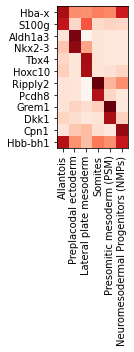

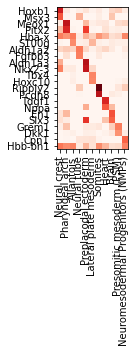

In [9]:
# Note that not all the tissues have to be plotted. Also, if a tissue asked
# has not already been computed, the function informs the user about it.
embryo.plot_top_3D_diff_expr_genes(tissues_to_process[:4]+[30, 31, 32], nb_genes=2);

# All the tissues plotted, 4 genes per tissues, repetition allowed,
# and the original values are plotted (not z-scored)
fig, ax = embryo.plot_top_3D_diff_expr_genes(tissues_to_process, nb_genes=2,
                                             repetition_allowed=False, compute_z_score=False,
                                             output_path='out/3D_diff_expr.pdf');

### Other visualization tools
Two other functions allow to visualize the 3D differentially expressed genes.

First `plot_volume_vs_neighbs` which allows to the relative volume occupied by expressing cells against their relative density for a given tissue.

The second function, `print_diff_expr_genes` allow to print the top `nb` genes for a given tissue

---
The function `plot_volume_vs_neighbs` takes as arguments at least a tissue `id`.

On top of that can be given a list of genes to identify on the plot through the argument `print_genes`.

The top _x_ genes can also be identified using the argument `print_top`

An `output_path` to the file in which to save the generated figure can be provided too.

Moreover, one can add keyword arguments to the function that will be forwarded to the `scatterplot` function from Seaborn. (see example below)

---
The function `print_diff_expr_genes` takes as arguments the tissue to display and the number of top genes to display

,Volume ratio,Avg #Neighbors ratio,Localization score,Interesting gene row ID,Gene names
162,0.092571,0.155126,0.206510,484,Cpn1
324,0.177143,0.178192,0.168213,1074,Hbb-bh1
607,0.085143,0.132064,0.167672,1859,Rhox5
756,0.029143,0.102269,0.163898,2237,Trap1a
323,0.185714,0.180180,0.163631,1073,Hba-x
494,0.206286,0.186511,0.155761,1488,Nin
180,0.446286,0.305987,0.155453,529,Cyp26a1
394,0.153143,0.158348,0.152402,1200,Irx3
285,0.257714,0.209218,0.149888,815,Gbx2
328,0.136000,0.148424,0.149635,1082,Hes3


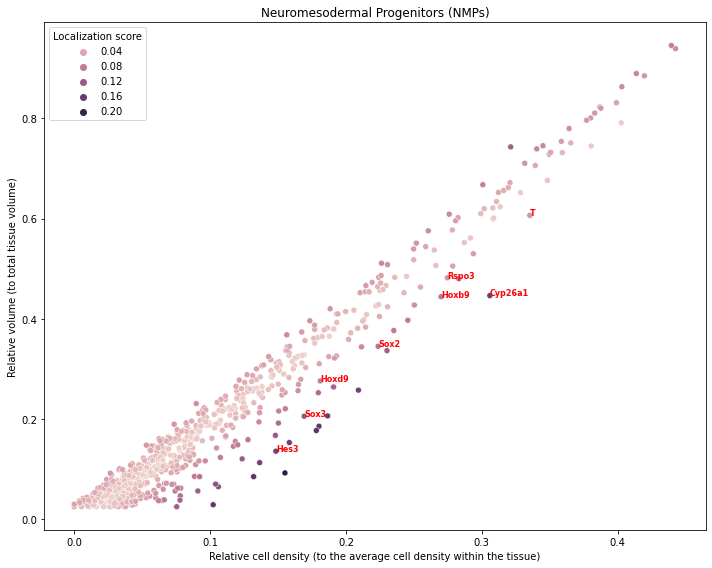

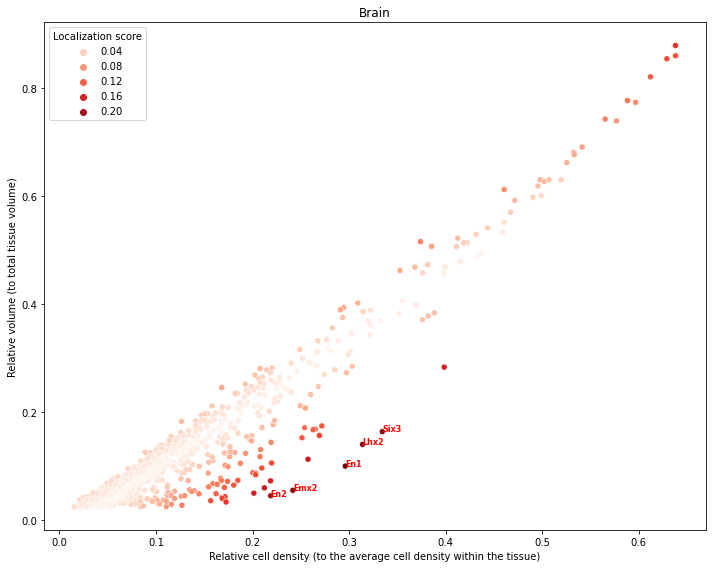

In [10]:
# Plotting the distribution for the tissue 31 highlighting a given set of genes
# and saving the figure in Vol_vs_Dens_31.pdf (note that a different path can be provided)
embryo.plot_volume_vs_neighbs(31, print_genes=['T', 'Sox2', 'Sox3',
                                               'Hes3', 'Hoxb9', 'Cyp26a1',
                                               'Rspo3', 'Hoxd9'],
                              output_path=f'out/Vol_vs_Dens_31.pdf')

# Plotting the distribution for the tissue 24 highlighting the top 5 genes.
# Note that the figure is not saved and that the palette arguments allows
# to give a different colormap for localization score.
embryo.plot_volume_vs_neighbs(24, print_top=5,
                              palette='Reds')

# Compute and display the top 10 genes for the tissue 31.
top_10 = embryo.print_diff_expr_genes(tissue=31, nb=10)
display(top_10)